In [92]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

In [93]:
def load_data():
    data=np.loadtxt(r'C:/Users/pedro\source/repos/PedroCorreia07/Machine Learing Specialization_Coursera/Course 1\data_linear regression/ex1data1.txt', delimiter=',')
    X=data[:,0] #creates a new NumPy array x which contains all the rows of data, but only the first column 
    y=data[:,1] #creates a new NumPy array y which contains all the rows of data, but only the second column (target)
    return X,y


In [94]:
x_train, y_train=load_data()

In [95]:
print("Type of x_train:", type(x_train))
print("First five x_train records are:",x_train[0:5])
print("Type of y_train:", type(y_train))
print("First five y_train records are:",y_train[0:5])

Type of x_train: <class 'numpy.ndarray'>
First five x_train records are: [6.1101 5.5277 8.5186 7.0032 5.8598]
Type of y_train: <class 'numpy.ndarray'>
First five y_train records are: [17.592   9.1302 13.662  11.854   6.8233]


In [96]:
print("The shape of the x_train is:",x_train.shape)
print("The shape of the y_train is:",y_train.shape) 
print("The number of training examples (m) is:",len(x_train))


The shape of the x_train is: (97,)
The shape of the y_train is: (97,)
The number of training examples (m) is: 97


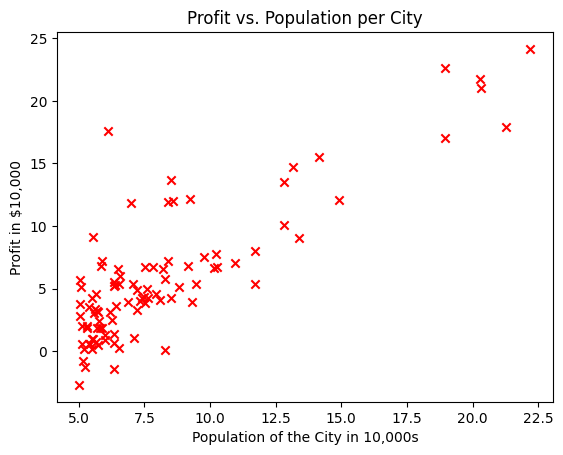

In [97]:
plt.scatter(x_train,y_train,marker="x",color="red")
plt.title("Profit vs. Population per City")
plt.ylabel("Profit in $10,000")
plt.xlabel("Population of the City in 10,000s")
plt.show()

Define cost funcion

In [98]:
def compute_cost(x,y,w,b): #define cost function
    m=x.shape[0] # number of training examples because x.shape=(number of rows, number of columns), so x.shape[0]=number of rows
    total_cost=0
    cost=0
    for i in range(m):
        f_wb=w*x[i]+b #define the linear regression function
        cost+=(f_wb-y[i])**2 #define the cost
    total_cost=cost/(2*m) #cost function
    return total_cost

Compute cost with some initial values for w,b

In [99]:
initial_w=2
initial_b=1

cost=compute_cost(x_train,y_train,initial_w,initial_b)
print(type(cost))
print(f"Cost at initial w (zeros):{cost:.3f}")

<class 'numpy.float64'>
Cost at initial w (zeros):75.203


Define gradient function

In [100]:
def compute_gradient(x,y,w,b): #define gradient function
    m=x.shape[0] # number of training examples because x.shape=(number of rows, number of columns), so x.shape[0]=number of rows
    dj_dw=0
    dj_db=0
    for i in range(m):
        f_wb=w*x[i]+b #define the linear regression function
        dj_db+=f_wb-y[i] #calculates the partial derivative of the cost function with respect to b for the i-th training example.
        dj_dw+=(f_wb-y[i])*x[i] #calculates the partial derivative of the cost function with respect to w for the i-th training example.
    dj_dw/=m #divides the sum of the partial derivative of the cost function with respect to w by m to get the average partial derivative.
    dj_db/=m #divides the sum of the partial derivative of the cost function with respect to b by m to get the average partial derivative.
    return dj_dw,dj_db





In [101]:
initial_w=0
initial_b=0

tmp_dj_dw,tmp_dj_db=compute_gradient(x_train,y_train,initial_w,initial_b)

print("Gradient at initial w, b (zeros):", tmp_dj_dw,tmp_dj_db)


Gradient at initial w, b (zeros): -65.32884974555672 -5.83913505154639


In [102]:
test_w=0.2
test_b=0.2

tmp_dj_dw,tmp_dj_db=compute_gradient(x_train,y_train,test_w,test_b)

print("Gradient at test w,b:",tmp_dj_dw,tmp_dj_db)

Gradient at test w,b: -47.41610118114435 -4.007175051546391


Verify that gradient descent is working correctly by verifying that the J(w,b) is decreasing with each step

In [103]:
def gradient_descent(x,y,w_in,b_in,cost_function,gradient_function,alpha,num_iters):
    m=len(x)#number of training examples

    J_history=[]
    w_history=[]
    w=copy.deepcopy(w_in) #creates a deep copy of w_in and assigns it to the variable w. This is done to avoid modifying the original value of w_in in case it is used later in the code
    b=b_in #b and b_in are two separate variables that happen to have the same initial value, but changing b later in the code will not affect the value of b_in.

    for i in range(num_iters):
        dj_dw,dj_db=gradient_function(x,y,w,b)

        w=w-alpha*dj_dw
        b=b-alpha*dj_db

        if i<100000: #In practice, the value 100000 can be adjusted depending on the size of the dataset and the computational resources available. If the dataset is small, a smaller value can be used, while a larger value can be used for larger datasets. It is also possible to remove this condition altogether and store the cost at every iteration if memory is not a concern.
            cost=cost_function(x,y,w,b)
            J_history.append(cost) #is appending the current value of the cost function to the end of the list J_history. This list is used to keep track of the cost function values at each iteration of the gradient descent algorithm. Later, this list can be used to plot the change in cost function with respect to the number of iterations.
        if i%math.ceil(num_iters/10)==0: #checks if the current iteration number i is a multiple of num_iters/10. This condition is true for every 10% of the total iterations, so it ensures that the progress is printed at regular intervals of 10%.
            w_history.append(w) #adds the current weights w to the w_history list, which keeps track of how the weights are updated throughout the optimization process.
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}") #prints the iteration number and the current cost of the model, which is the last element in the J_history list. The {i:4} specifies that the variable i should be formatted with a width of 4 characters and :8.2f that the cost should be formatted as a float with a width of 8 characters and 2 decimal places.
    return w,b,J_history,w_history


In [104]:
#initialize fitting parameters. Recall that the shape of w is (n,)
initial_w=0.
initial_b=0.

iterations=1500
alpha=0.01 # I should normaly take learning rate (alpha) values [...,0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, ...]

w,b,_,_=gradient_descent(x_train,y_train,initial_w,initial_b,compute_cost,compute_gradient,alpha, iterations)
print("w,b found by gradient descent:",w,b)

Iteration    0: Cost     6.74
Iteration  150: Cost     5.31
Iteration  300: Cost     4.96
Iteration  450: Cost     4.76
Iteration  600: Cost     4.64
Iteration  750: Cost     4.57
Iteration  900: Cost     4.53
Iteration 1050: Cost     4.51
Iteration 1200: Cost     4.50
Iteration 1350: Cost     4.49
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


To calculate the predictions on the entire dataset, we can loop through all the training examples and calculate the prediction for each example. This is shown in the code block below.

In [105]:
m=x_train.shape[0]
predicted=np.zeros(m) #initializes an array of size m with zeros. This array will be used to store the predicted values of the linear regression model.

for i in range(m):
    predicted[i]=w*x_train[i]+b

Text(0.5, 0, 'Population of City in 10,000s')

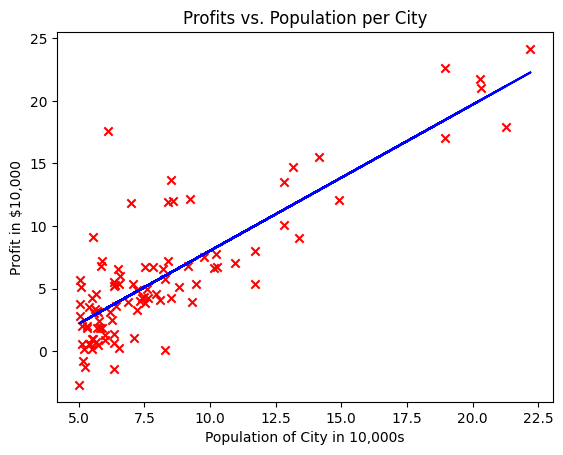

In [106]:
#plot the predicted values to see the linear fit
plt.scatter(x_train,y_train,marker="x",color="red")
plt.plot(x_train,predicted,color="b")

plt.title("Profits vs. Population per City")
plt.ylabel("Profit in $10,000")
plt.xlabel("Population of City in 10,000s")

Let's predict what the profit would be in areas of 35,000 and 70,000 people

In [107]:
predict1=3.5*w+b
print("For population = 35,000, we predict a profit of $%.2f" %(predict1*10000))

predict2=7.0*w+b
print("For population = 70,000, we predict a profit of $%.2f" %(predict2*10000))

For population = 35,000, we predict a profit of $4519.77
For population = 70,000, we predict a profit of $45342.45


Not included in the assignment

In [108]:
from sklearn.metrics import r2_score

print("Mean absolute error: %.2f"%np.mean(np.absolute(predicted-y_train)))
print("Residual sum of squares (MSE):%.2f"%np.mean((predicted-y_train)**2))

print("R2-score:%.2f"%r2_score(predicted,y_train))

Mean absolute error: 2.21
Residual sum of squares (MSE):8.97
R2-score:0.56
